In [45]:
import numpy as np
import sympy as sp
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Differential Equations and Their Usecases

## Table of Contents
 1. Introduction to Differential Equations
    1. Definition
    2. Examples of Differential Equations
    3. Slope Field
 2. Classification of Differential Equations
    1. Order of Differential Equation
    2. Ordinary and Partial Differential Equations 
    3. Linear and Non-linear Differential Equations 
    4. Homogeneous and Non-homogeneous Differential Equations
 3. Ordinary Differential Equations
    1. Separable Differential Equation
 4. Partial Differential Equations
 5. Bibliography
 6. References

## 1. Introduction to Differential Equations

### Definition:
At their core Differential Equations(DEs) are equations in which there might be variables as well as ***functions*** of those variables and the **derivatives** of said ***functions***$ ^{[1]} $. The crucial part of a DE and where it gets its name from is the presence of **derivatives** of unknown ***functions***. In practice, the ***functions*** within these equations most commonly represent physical quantities, while their **derivatives** are their rate of change. The DEs relate the ***functions*** to their **derivatives**$ ^{[2]} $. It is important to realize that the wanted result is a ***function*** or a class of ***functions*** instead of a concrete value or a set of values which is the case with algebraic equations. DEs allow us to model the material world around us in mathematical terms, they have proved to be irreplaceable when it comes to **physics**, **engineering**, **economics** and *more*$ ^{[2]} $.

### Examples of Differential Equations
Definitions can often be quite vague so now let's look at some examples of what different types DEs look like. Interpreting what DEs express can be difficult so we will warm up with something very easy.

Leibniz's notation
$$ \frac{df(x)}{dx} = f(x) $$
$$ \frac{dy}{dx} = f(x) $$

Lagrange's notation
$$ f'(x) = f(x) $$

Newton's notation
$$ \dot y = y$$
$$ y' = y $$

Essentially all four of these represent the same DE. The only difference is the notation they use. In reality the last notation is the most commonly used when it comes to DEs as it is the most concise and neat. Usually in literature the dot symbol in $ \dot y $ represents $ \frac{dy}{dt} $ while the prime symbol notation $ y' $ represents $ \frac{dy}{dx} $, we will discuss the difference between the two later on. This, however, does not mean that the rest of the notations are not used as they have their use cases as well. Something to note is that $y \equiv y(x)$, which means that $y$ denotes a function, not to be confused with a variable. Well, this particular problem is very reminiscent of the exponential function $e^x$ and one, through intuition, might guess the solution. However, simply guessing that $y = e^x$ is the solution does not paint the full picture as it is only one of the infinitely many solutions. In reality the correct solution would be $ y = Ce^x $, where $ C $ is an any arbitrary constant. We will look into the solution later on. For now let's look into some more examples.

(1) $$ 2y' = \frac{sin(x)}{y^3} $$
(2) $$ y' = f(x, y) $$
(3) $$ y'' + y' + 6x = 5 $$
(4) $$ y'' = -g $$
(5) $$ 8y^{IV} + 6y''' + 12 y'' -4y' + 2y = cos(x) $$
(6) $$ sin(y) \cdot y'' = (1-y) \cdot y' + y^2 \cdot e^{-5y}$$
(7) $$ y' + \frac{3}{2x+1}y = \frac{2x-2}{\sqrt{y}} $$

All of the examples above are the so called Ordinary Differential Equations(ODEs), however they are not the only type as there are Partial Differential Equations(PDEs) which are more complex and difficult. Let's check them out.

***TODO:*** Add examples
(7) $$  $$

***TODO:***: Add notes about examples

***TODO:*** Add definition for independent variables

***TODO:*** Add definition for dependent variables
### Order of Differential Equations
The order of the DE is determined by the highest order derivative present in the equation. We can see that (1), (2) are first order while (3) is second order and (4) is fourth order and so on. It turns out that most commonly DEs of second order are used in practice.

### Initial Conditions
As discussed above the DE $ y' = y $ has infinitely many solutions due to the unknown constant $ C $. The truth is that every ODE and PDE have infinitely many solutions unless there are specified initial conditions. Initial conditions specify the values of the function $ y $ or its derivatives $ y^n $ in specified points. They are often expressed in the following form $ y(x_0) = y_0 $ or $y^n(x_0) = y_n $. Usually, the order of a DE determines the amount of initial conditions needed find the actual solution of a DE. Essentially, without initial condition we are able to find only the general solutions and with initial conditions we are able to find the actual solution to a DE.

## 2. Classification of Differential Equations 

### Ordinary and Partial Differential Equations
DEs are most commonly divided into two groups between Ordinary Differential Equations(ODE) and Partial Differential Equations(PDE). Whether a DE is ODE or PDE depends on the presence of *partial derivatives*. Partial derivatives can occur only when there are more than one independent variables. By definition ODEs contain **only one independent** variable and **at least one derivative** with respect to that variable $^{[4]}$, while PDEs contain partial derivatives of the dependant variable with respect to **more than one** independent variable $^{[5]}$. In practice PDEs are much harder to solve than ODEs, however, PDEs are used to describe much more intricate systems such as *fluid dynamics*, *heat transfer*, *image processing* and more $ ^{[6]} $.

### Linear and Non-linear Differential Equations
Just like in algebraic equations linear DEs are great as they are much easier to solve and are often preferred. What makes a DE linear is not exactly clear. One DE is considered linear when it satisfies the following form: 

$$ a_n(x)y^{n} + a_{n-1}(x)y^{n-1} + \dotsm + a_1(x)y' + a_0(x)y = f(x) $$ 

Some notes about the linear form are that $ n $ is the order of the derivative and of course just a reminder $ y \equiv y(x) $. What is more important is noticing that neither the function $ y $ nor its derivatives are to a power higher than one and they are not part of any other non-linear functions and that every $ x $ can be either a zero or non-zero and linear or non-linear functions $^{[6]}$. Something of note as well is that the linear form of DEs is very reminiscent of the form of polynomials, which is of course:

$$ a_nx^n + a_{n-1}x^{n-1} + \dotsm + a_1x + a_0 = f(x) $$

Having both forms side by side makes the similarities evident. 
Since we now have defined what a linear DE is any DE which does not satisfy the given form above can be considered non-linear.

### Homogeneous and Non-homogeneous
Homogeneous DE are linear DEs, whose $ f(x) = 0 $, any linear DEs, whose $ f(x) \neq 0 $ is called non-homogeneous or inhomogeneous. 

## 3. Ordinary Differential Equations

### Separable Differential Equations
Separable DEs are one of the more straightforward ones, in fact the very first example, $ y' = y $, we looked at, the "trivial" one, turns out to be a separable DE. But it is not quite clear what makes it separable as we did not even solve it and just guessed the solution. These equations can be summarized by the following form.

$$ f(y)\frac{d^ny}{dx^n} = g(x) $$

If a DE satisfies this form then it can be solved through separation. Note that on the left-hand side we have a function of the unknown function multiplied by its derivative, while on the right-hand side there is a function of the independent variable. Another thing to point out is that the derivative is written in its Leibnitz notation, this is done on purpose as we will treat the differential notation as a fraction, this looks very illegal, but bear with me for a moment. Essentially we would like to integrate both sides of the equation and this can be done by transferring the $ dx $ over to the $ g(x) $ function then add the integral symbol to both sides of the equation.

$$ f(y)\frac{dy}{dx} = g(x) \rightarrow  f(y)dy = g(x)dx $$
$$ \int f(y)dy = \int g(x)dx $$

Once we integrate enough times we have our resulting function. Now let's explain what we just did. A very brief explanation would be that technically we could think of $ \frac{dy}{dx} $ as $ \frac{slope}{run} $ or in other words a very small change in $ y $ and a very small change in $ x $, which would technically make it a real fraction, however we can dive deeper. Consider the following in order to get our result we would like to integrate both sides of the equation no matter what so we do $ ^{[7]} $.

$$\int f(y) \frac{dy}{dx}dx = \int g(x)dx $$  

We can then do u-substitution like so

$$ u = y $$
$$ du = y'dx \rightarrow du = \frac{dy}{dx}dx $$
$$ \int f(u) du = \int g(x)dx $$

Now all that is left to do is integrate both sides and substitute back for $ u $ . If we do that and compare both methods we can conclude that treating the derivation notation as a fraction does work just as the correct mathematical way of doing it would do. Now that we know how to solve a separable DE let's write out the solution to the trivial case. We will be treating the differential notation as a fraction as it is more convenient and we proved that it can be done.

$$ \frac{dy}{dx} = y $$
$$ \frac{dy}{y} = dx $$
$$ \int \frac{dy}{y} = \int dx $$
$$ \ln{y} = x + C $$
$$ e^{\ln{y}} = e^{x + C} $$
$$ y = C \cdot e^x $$

Great, we solved the trivial case, but it is a bit boring and it does not really give us all that information about the power of DEs. Now let's solve something a bit more interesting. Consider that an object is at free fall on Earth($ g = 9.8\frac{m}{s^2}$). How can we derive a formula for motion just like Newton did. It turns out it is simple actually as we know that the second derivative of position with respect to time is acceleration we can model a DE like so $ y''(t) = -g $, notice that this time y will be a function of time. 

$$ \frac{d^2y}{dt^2} = -9.8 $$
$$ \frac{dy}{dt} = \int -9.8dt $$
$$ \frac{dy}{dt} = -9.8t + C_1 $$
$$ y = \int -9.8t + C_1 dt $$
$$ y = -9.8\frac{t^2}{2} + C_1t + C_2 $$

***TODO:*** Add further explanation

### Slope Field
Slope fields or vector field are a useful tool when it comes to first-order DEs. They present graphical representation of possible solutions of a given first-order DE as they give the slope(vector) of a differential equation in a particular set of $ x $ and $ y $ values. The slope field can be defined as so $ y' = f(x, y) $. Usually the slopes on a slope field are represented in the vector form $ [1, f(x, y)] $, however, to make them more presentable these vectors are normalized $^{[6]}$. Let's try and plot some slope fields.

***TODO:*** Plot slope fields

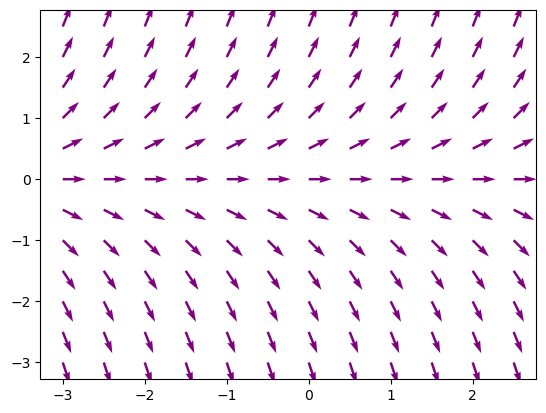

In [68]:
x = np.arange(-3, 3, 0.5)
y = np.arange(-3, 3, 0.5)

X, Y = np.meshgrid(x, y)
#dy = 5 * Y * (1-Y/1000)
dy = Y 
dx = np.ones(dy.shape)

norm = np.sqrt(dx**2 + dy**2)
dyu = dy/norm
dxu = dx/norm
plt.quiver(X,Y, dxu, dyu, color='purple')
plt.show()

### First Order Linear Differential Equations
We already discussed what linear DE are, so now let's discuss how they are solved. It turns out that there is a general formula which solves linear equations, however it is a bit unclear why and how it works and since memorizing formulas by heart is discouraged let's derive it. To begin with we make sure that our equation is in the following form $ \frac{dy}{dx} + p(x)y = g(x) $, where both $ p(x) $ and $ g(x) $ have to be continuous functions $^{[9]} $. When we have properly set up the equation then we proceed to find the integration factor, which is a function selected so that whenever a DE is multiplied by it the DE becomes integrable $ ^{[10]} $. We will be calling our integrating factor function $ \mu (x) $. Then we can proceed with the derivation of the general formula. First we multiply our equation by $ \mu(x) $.

$$ \frac{dx}{dx} + p(x)y = g(x) $$
$$ \mu(x)\frac{dx}{dx} + \mu(x)p(x)y = \mu(x)g(x) $$

Then we reveal the magic behind $ \mu(x) $ as it must satisfy the following condition $ \mu(x)p(x) = \mu'(x) $. Since we have $ \mu(x)p(x) $ in our equation we substitute it.

$$ \mu(x)\frac{dx}{dx} + \mu'(x)y = \mu(x)g(x) $$

We can notice that the left-hand side of our equation is the differentiation product rule as we once differentiate $ \mu(x) $ and once $ y $.

$$ (y \cdot \mu(x))' = \mu(x)g(x) $$

In order to find out $ y $ function we then integrate both sides and with some algebra we can express $ y $.

$$ \int y \cdot \mu(x))' dx = \int \mu(x)g(x) dx $$
$$ y \cdot \mu(x) + C = \int \mu(x)g(x) dx $$
$$ y = \frac{\int \mu(x)g(x) dx + C}{\mu(x)} $$

Now we have expressed $ y $ and we need to determine our integrating factor $ \mu(x) $. We can do that by the following rearrangement: 
$$ \mu(x)p(x) = \mu'(x) \rightarrow \frac{\mu'(x)}{\mu(x)} = p(x) $$ 
$$ (\ln{\mu(x)})' = p(x) $$
$$ \int (\ln{\mu(x)})' dx = \int  p(x) dx $$
$$ \ln{\mu(x)} = \int p(x) dx + k $$
$$ \mu(x) = e ^{\int p(x) dx + k} \rightarrow \mu(x) = ke ^{\int p(x) dx} $$

Finally we can substitute the integrating factor $ \mu(x) $ into the general formula.
$$ y = \frac{\int e^{\int p(x)dx} g(x)dx + C}{e^{\int p(x)dx}} $$

This looks a bit too messy so we will just use the general formula knowing $ \mu(x) = e ^{\int p(x) dx} $.
$$ y = \frac{\int \mu(x)g(x) dx + C}{\mu(x)} $$ 


***TODO:*** Solve an example
$$ xy' - y = x^2e^2 $$

***TODO:*** Discuss structure of solution
$$ y = Cy_0 + \eta $$
Where $ y_0 $ is the solution to the homogeneous part and $ \eta $ is the solution to the non-homogeneous part. Linearity of solutions

### Bernoulli's Differential Equations
Bernoulli DEs are non-linear differential equations, which can easily be turned into linear through substitution. Bernoulli equations usually can be expressed by the following form.

$$ p(x)\frac{dy}{dx} + q(x)y = f(x)y^n $$

Where $ n \in \mathbb{R} $ except $\{0, 1\} $, as when $ n = 0 $ the equation is linear and when $ n = 1 $ the equation is separable. In order to convert the Bernoulli equation to a linear one first we need to remove the non-linear $ y^n $ term from the right-hand side and then we can proceed with substitution. We divide both sides by the non-linear term $^{[11]}$.

$$  p(x)y^{-n} y' + q(x)y^{1-n} = f(x) $$

Then we proceed by substituting.

$$ u = y^{1-n} $$
$$ u' =  (y^{1-n})' = (1-n)y^{-n}y' \rightarrow y^{-n}y' = \frac{u'}{1-n} $$ 

After having expressed $ y^{1-n} $ and $ y^{-n}y' $ we get.

$$ \frac{p(x)}{1-n}u' + q(x)u = f(x) $$

And just like that we converted a non-linear equation into a first order linear one, which can be solved by using the integrating factor. 

### Logistic Population Model
The logistic population model is a famous Bernoulli equation invented by Pierre Verhulst. The logistic function essentially tells us the rate of change of population with respect to time. It turns out that the increase in population is proportional to the population itself, however in reality there are outside factors, which limit the growth of population to a particular limiting value. Let's look into the model.

$$ y' = ry $$

This would be the model if the growth of the population was not limited by any factors. The constant $ r $ is proportionality factor. So far our model is non-limited and its solution would look like so $ y = y_0e^{rt}$, where $ y_0 $ is the initial population. To have a realistic model the growth of population would have to approach zero when the population gets closer to the limiting value of the model. We will be calling the liming value $ K $.

$$ y' = ry - \frac{r}{K}y^2 $$

Notice that this has now become a Bernoulli equation. This modeling function is often written like so.

$$  y' = ry(1 - \frac{y}{K}) $$


### Numerical Methods (optional)

### Existence and Uniqueness (optional)

### Homogeneous Substitution Differential Equations 

### Second Order Differential Equations

## Bibliography
1. An Introduction to Differential Equations by James C. Robinson

## References
1. [BYJU'S](https://byjus.com/maths/differential-equation/)
2. [Differential Equations Wikipedia](https://en.wikipedia.org/wiki/Differential_equation)
3. [Ordinary Differential Equations  BYJUS](https://byjus.com/maths/ordinary-differential-equations/)
4. [Partial Differential Equations BYJUS](https://byjus.com/maths/partial-differential-equation/)
5. [Applications of Partial Differential Equations in Engineering field](https://www.linkedin.com/pulse/applications-partial-differential-equations-field-geetha-muthu)
6. [Slope Field Wikipedia](https://en.wikipedia.org/wiki/Slope_field)
7. [Paul's Online Notes Separable Differential Equations](https://tutorial.math.lamar.edu/Classes/DE/Separable.aspx)
8. RESERVED FOR SLOPE FIELD SOURCE 
9. [Paul's Online Notes Linear Differential Equations](https://tutorial.math.lamar.edu/Classes/DE/Linear.aspx)
10. [BYUJ'S Integrating Factor](https://byjus.com/maths/integrating-factor/)
11. [Bernoulli Differential Equations Wikipedia](https://en.wikipedia.org/wiki/Bernoulli_differential_equation)